<a href="https://colab.research.google.com/github/mghildi/Data_Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!gdown 1JpyI0xXunXRq8JXqVX_0HCzULQifbetQ

Downloading...
From: https://drive.google.com/uc?id=1JpyI0xXunXRq8JXqVX_0HCzULQifbetQ
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 34.0MB/s]


In [13]:
df = pd.read_csv('Jamboree_Admission.csv')

In [14]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
#check shape of dataset
df.shape

(500, 9)

In [16]:
df['Research'].value_counts()
#So research column only contain 2 values

1    280
0    220
Name: Research, dtype: int64

In [17]:
#We should remove Serial no column as this column will not help in modeling
df.drop('Serial No.', axis =1 , inplace = True)

Data set contains 500 rows and 9 columns

In [18]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


There is no null values in entire dataset

In [19]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Dont see any significant outliers.Lets confirm it by plotting a distribution

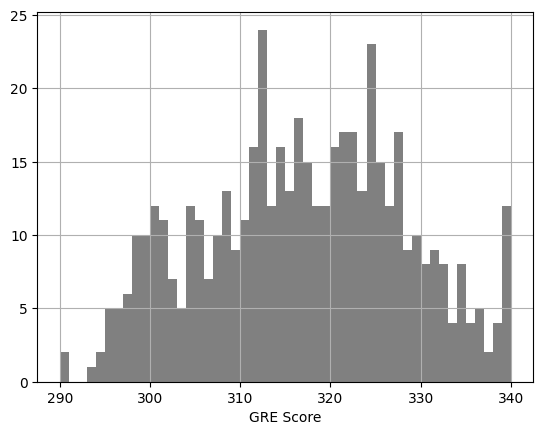

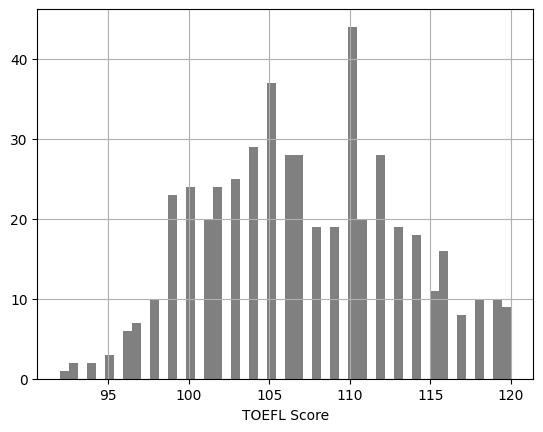

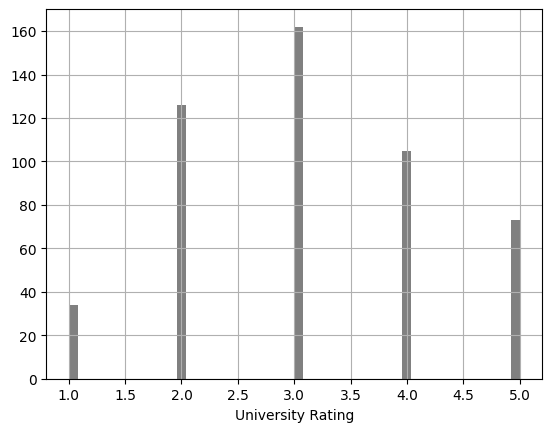

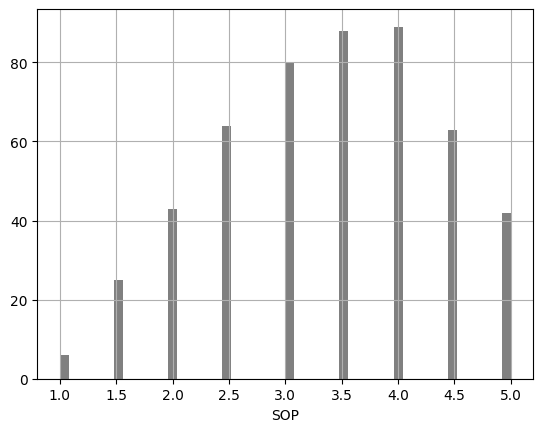

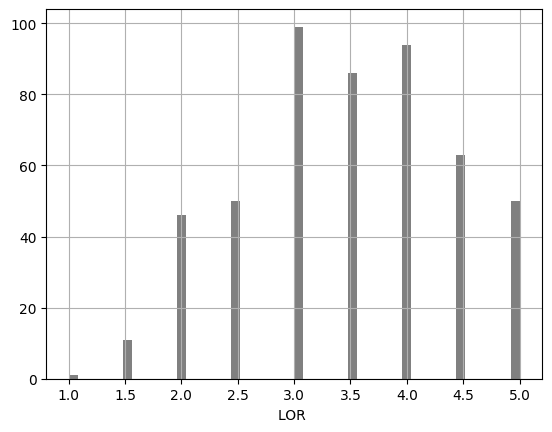

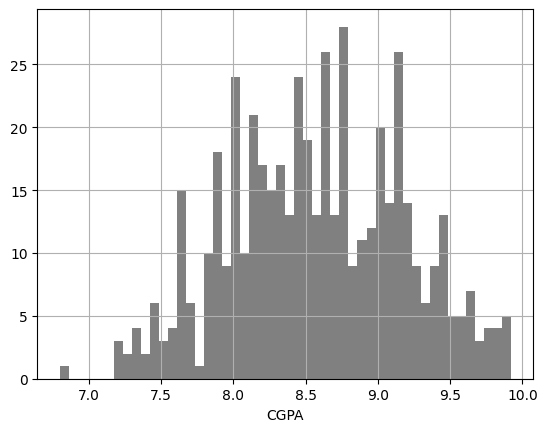

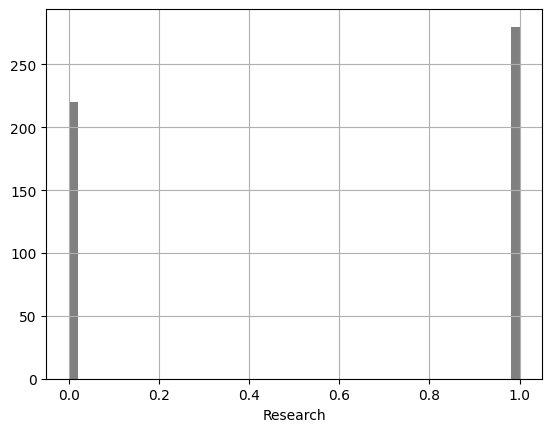

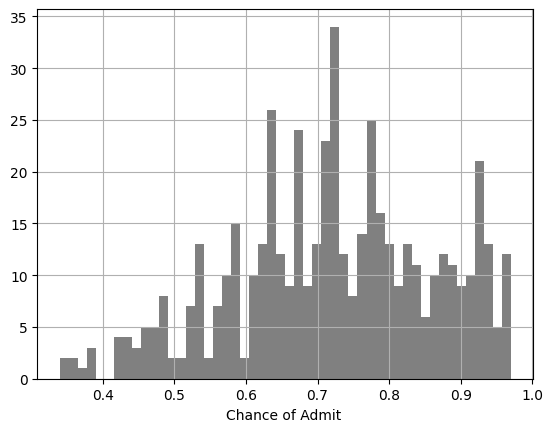

In [20]:
for i,j in df.items():
  df[i].hist(bins=50, color ='grey')
  plt.xlabel(i)
  plt.show()

key Features in distribution :
a) No significant outliers in any of the column
b) University rating is a whole number. No rating in decimal
c) SOP Rating and LOR rating is a multiple of 0.5
d) Research rating can be only under two category of 0 or 1

In [21]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


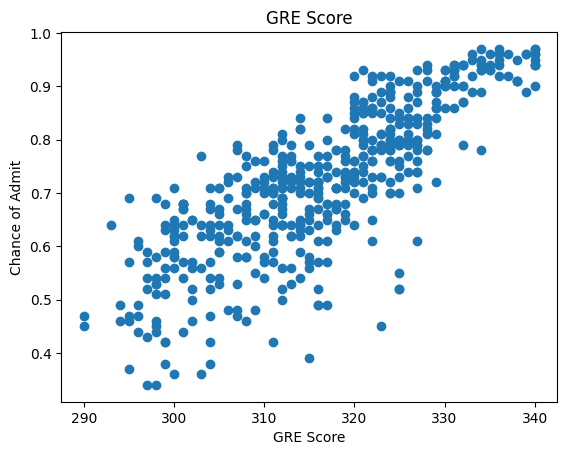

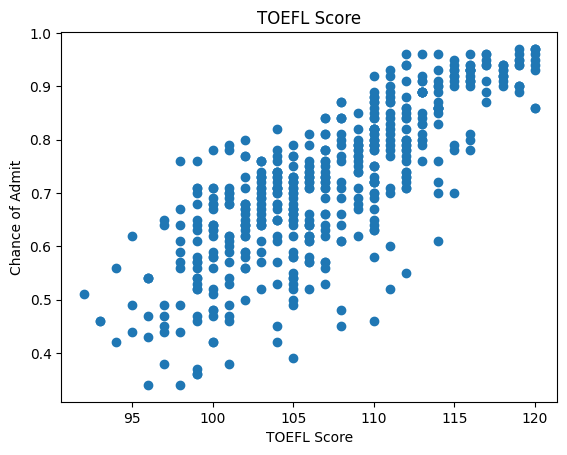

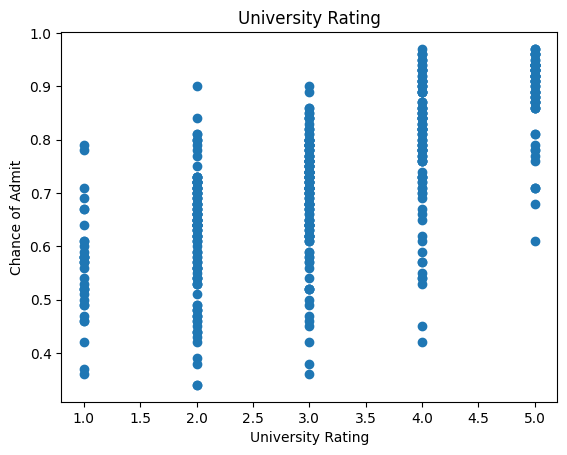

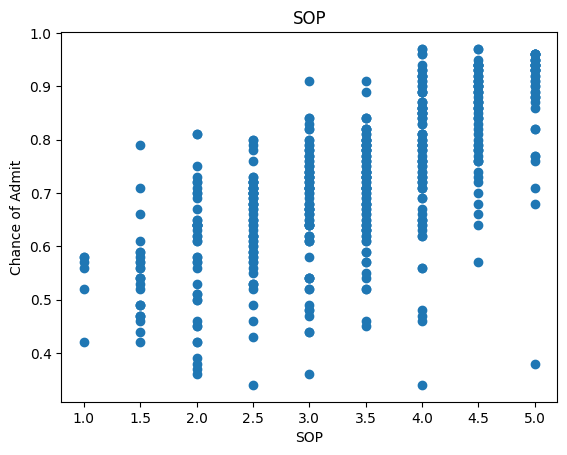

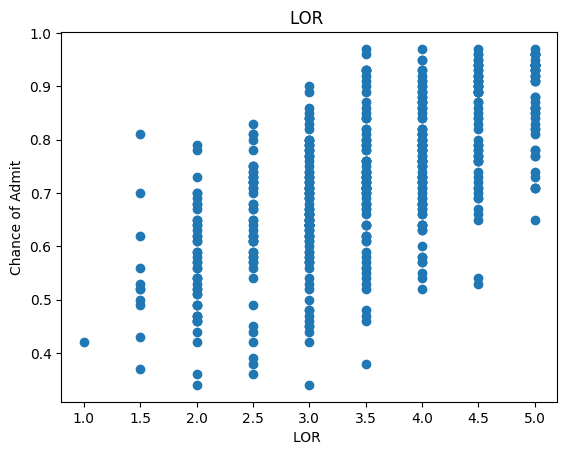

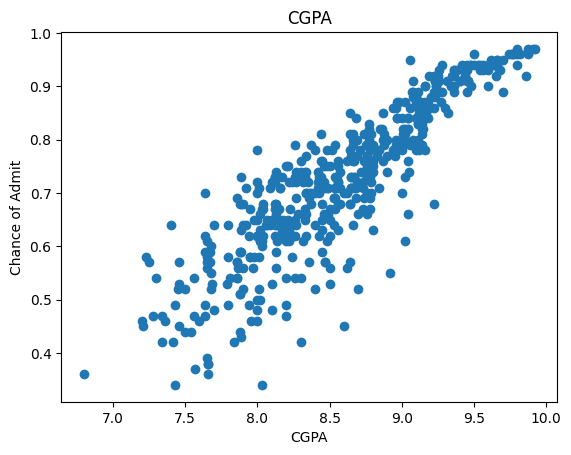

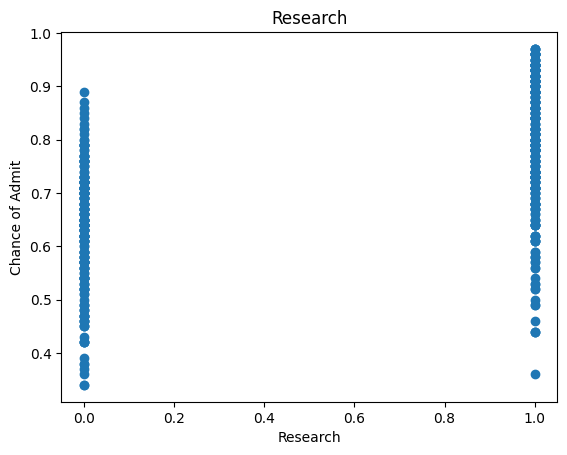

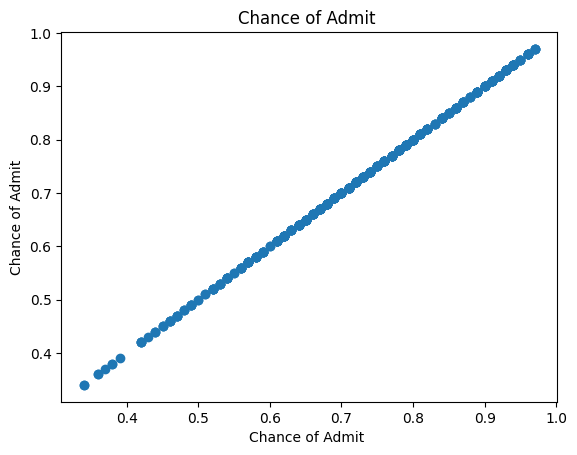

In [22]:
for i in df.columns:
  fig = plt.figure()
  plt.scatter( df[i], df['Chance of Admit '])
  plt.ylabel("Chance of Admit")
  plt.xlabel(i)
  plt.title(i)
  plt.show()

Visually by looking at a scatter plot we can infer that there is positive corelation of chance of Admit with:
a) GRE Score
b) University rating
c)SOP
d) LOR
e) CGPA

Lets check the correlation between different features

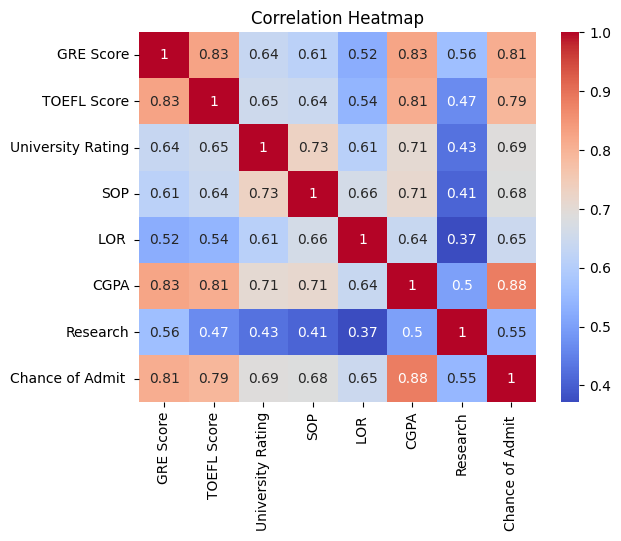

In [23]:
correlation_matrix = df.corr()

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()








Chance to admit have positive correlation with every feature with minimum being Research. We also see some of independent variable are also corelated with each other. Later while doing multicolienearity we can check whether it pass the assumptions of Linear regression or not

In [24]:
#Select feature for regression Model . X is dependent variable and Y is independent
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']  # Select the target variable

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [26]:
#Split the data into train, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
#Standard Scaler helps to keep all independent variable in same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.transform(X_test)



In [28]:
#Train model on training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
#Prediction
y_pred = model.predict(y_train_scaled)


In [30]:
from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
r2


0.8157672116057978

<function matplotlib.pyplot.show(close=None, block=None)>

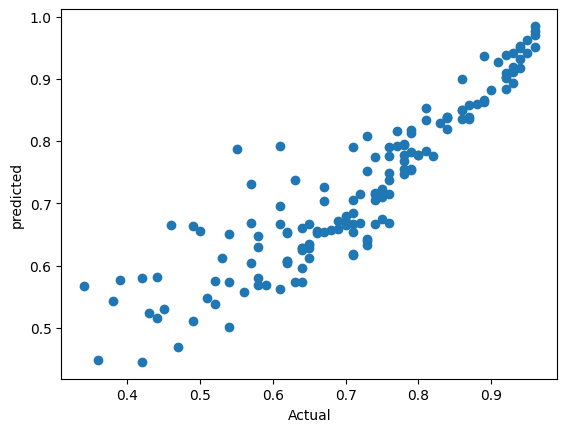

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show
#looks more or less linear with few deviation

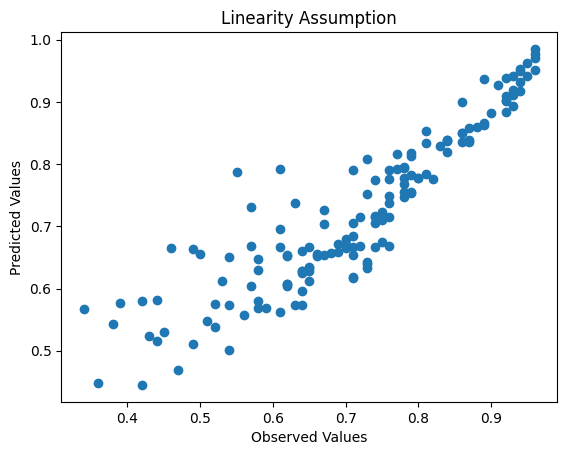

In [32]:
#check Linear regression assumptions
#linearity check
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Linearity Assumption')
plt.show()
#looks linear with few outliers

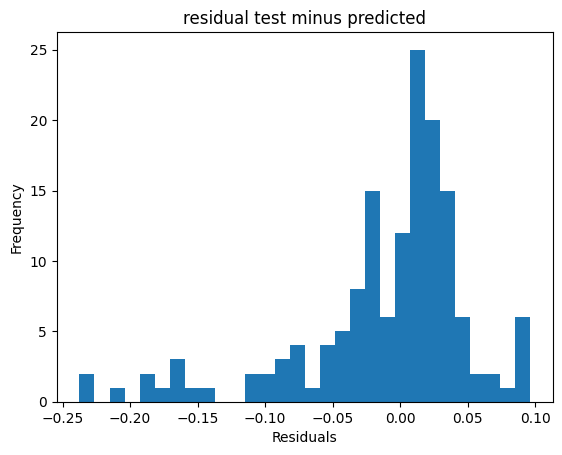

In [33]:
#Normality Assumption:
residuals = y_test - y_pred

plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('residual test minus predicted')
plt.show()
#normal with little left skewed

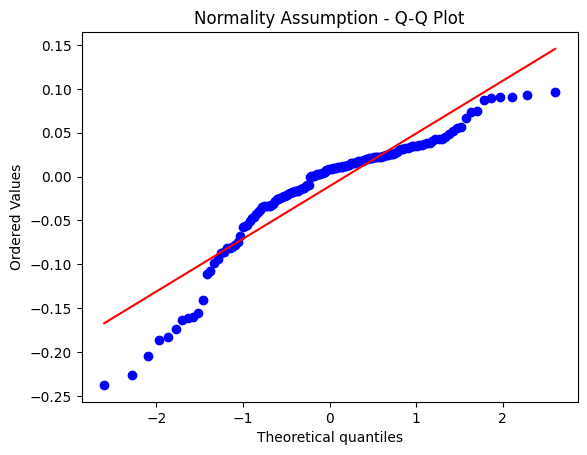

In [34]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Assumption - Q-Q Plot')
plt.show()

In [35]:
#independence - We assume obs are independent of each other as data is collected independently

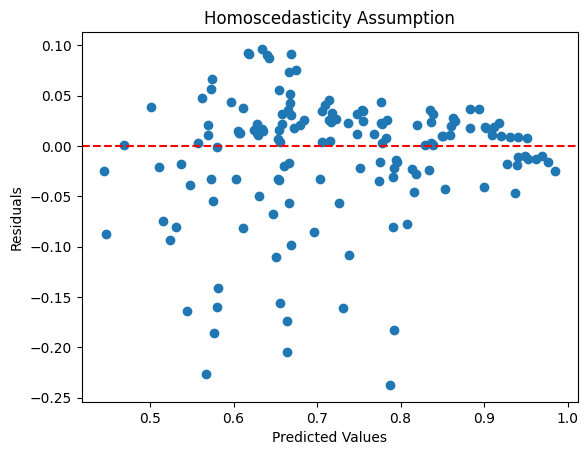

In [36]:
# Check homoscedasticity assumption using a scatter plot
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Assumption')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#The variance of the residuals have some outliers

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the predictor variables
X_train_df = pd.DataFrame(X_train_scaled, columns=['GRE Score', 'TOEFL Score', 'University Ratin',
'SOP', 'LOR', 'CGPA','Research'
                                                   ])

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X_train_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif)


           Variable       VIF
0         GRE Score  4.490801
1       TOEFL Score  4.150300
2  University Ratin  2.999308
3               SOP  2.962935
4               LOR  2.026492
5              CGPA  4.634872
6          Research  1.528120


In [38]:
# Extract linear regression equation
coefficients = model.coef_  # Coefficients (slopes) of the linear regression equation
intercept = model.intercept_  # Intercept of the linear regression equation

# Print the equation
equation = "y = "
for i, feature in enumerate(X.columns):
    equation += f"({coefficients[i]:.2f} * {feature}) + "
equation += f"{intercept:.2f}"
print(equation)

y = (0.02 * GRE Score) + (0.02 * TOEFL Score) + (0.01 * University Rating) + (-0.00 * SOP) + (0.01 * LOR ) + (0.06 * CGPA) + (0.01 * Research) + 0.73


Lets remove TOEFL to counter moderate colinearity






In [39]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
df.drop('TOEFL Score', axis=1 , inplace=True)

In [55]:
X_train_df = pd.DataFrame(X_train_scaled, columns=['GRE Score',  'University Ratin',
'SOP', 'LOR', 'CGPA','Research'
                                                   ])

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X_train_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif)

           Variable       VIF
0         GRE Score  3.407440
1  University Ratin  2.985152
2               SOP  2.912335
3               LOR  2.025883
4              CGPA  4.251969
5          Research  1.522237


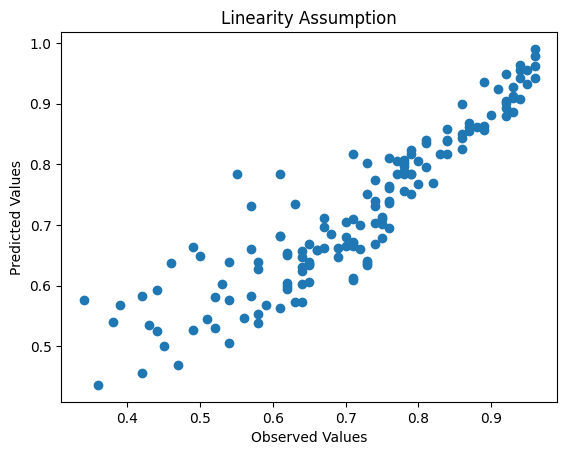

In [46]:
#check Linear regression assumptions
#linearity check
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Linearity Assumption')
plt.show()
#looks linear with few outliers

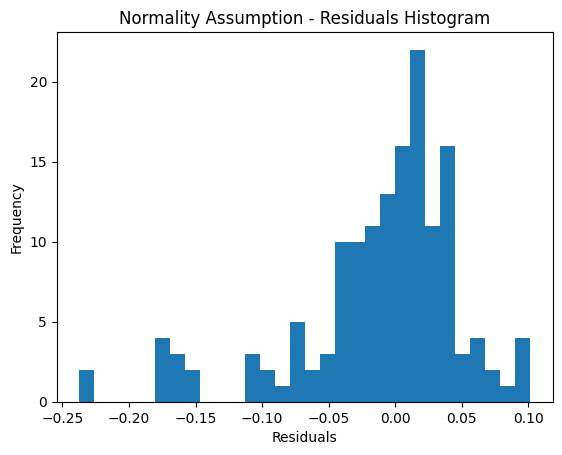

In [47]:
#Normality Assumption:
residuals = y_test - y_pred

plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality Assumption - Residuals Histogram')
plt.show()
#normal with little left skewed

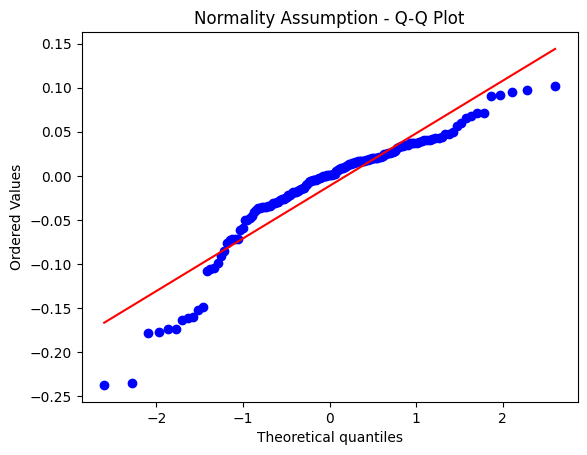

In [48]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Assumption - Q-Q Plot')
plt.show()

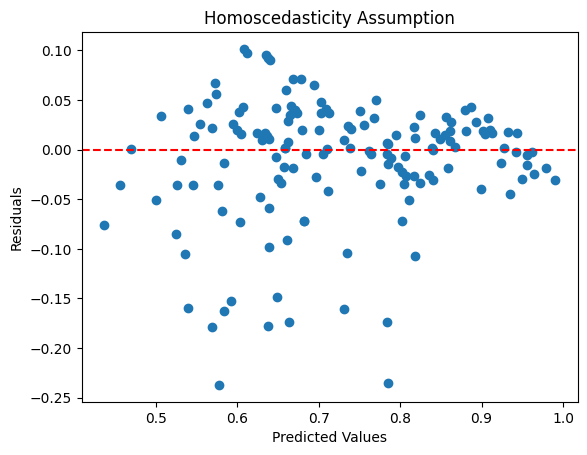

In [49]:
# Check homoscedasticity assumption using a scatter plot
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Assumption')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#The variance of the residuals is more or less constant across all levels

In [56]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']
#Split the data into train, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
#Prediction
y_pred = model.predict(X_test_scaled)

In [58]:
from sklearn.metrics import r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.004021971974441409
R-squared: 0.8204093741722059


In [50]:
# Extract linear regression equation
coefficients = model.coef_  # Coefficients (slopes) of the linear regression equation
intercept = model.intercept_  # Intercept of the linear regression equation

# Print the equation
equation = "y = "
for i, feature in enumerate(X.columns):
    equation += f"({coefficients[i]:.2f} * {feature}) + "
equation += f"{intercept:.2f}"
print(equation)

y = (0.03 * GRE Score) + (0.01 * University Rating) + (0.00 * SOP) + (0.01 * LOR ) + (0.07 * CGPA) + (0.01 * Research) + 0.73


The coefficient for GRE Score is 0.03. This indicates that a one-unit increase in GRE Score is associated with an estimated increase of 0.03 units in the outcome variable y, holding all other variables constant.

The coefficient for University Rating is 0.01. This suggests that a one-unit increase in University Rating is associated with an estimated increase of 0.01 units in the outcome variable y, holding all other variables constant.

The coefficient for SOP is 0.00. This suggests that SOP does not have a significant impact on the outcome variable y, as its coefficient is close to zero.

The coefficient for LOR is 0.01. This indicates that a one-unit increase in LOR is associated with an estimated increase of 0.01 units in the outcome variable y, holding all other variables constant.

The coefficient for CGPA is 0.07. This suggests that a one-unit increase in CGPA is associated with an estimated increase of 0.07 units in the outcome variable y, holding all other variables constant.

The coefficient for Research is 0.01. This indicates that having research experience (Research variable = 1) is associated with an estimated increase of 0.01 units in the outcome variable y, compared to not having research experience (Research variable = 0), while holding all other variables constant.

The intercept term is 0.73. This represents the estimated value of the outcome variable y when all predictor variables are zero.